In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Data = pd.read_csv('train.csv')

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

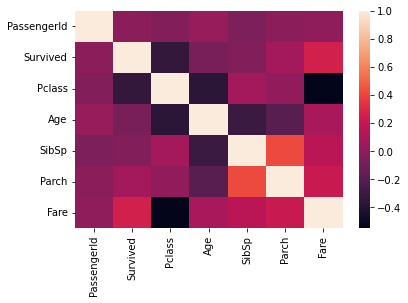

In [5]:
sns.heatmap(Data.corr())

In [8]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
Data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
Data_num = Data[['SibSp', 'Age', 'Fare', 'Parch']]
Data_cat = Data[['Sex', 'Embarked', 'Survived', 'Cabin', 'Pclass', 'Ticket']]

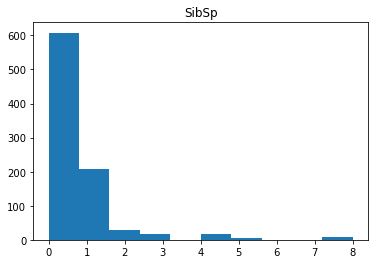

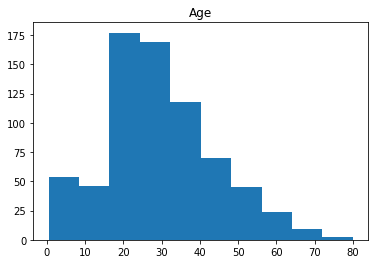

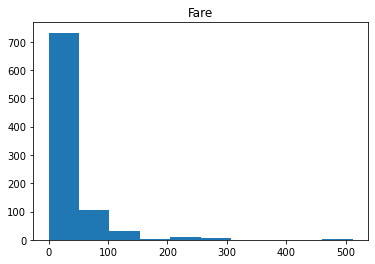

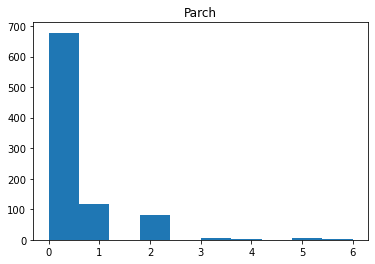

In [16]:
for i in Data_num.columns:
    plt.hist(Data_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

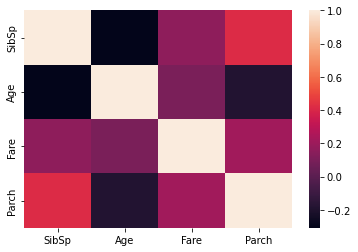

In [19]:
sns.heatmap(Data_num.corr())


<AxesSubplot:>

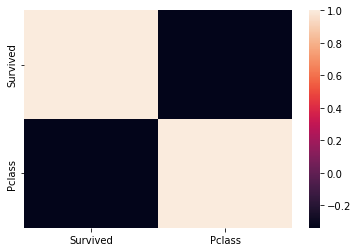

In [18]:
sns.heatmap(Data_cat.corr())

In [20]:
pd.pivot_table(Data, index = 'Pclass', values = ['SibSp', 'Age', 'Fare', 'Parch'])

,Age,Fare,Parch,SibSp
Pclass,,,,
1,38.233441,84.154687,0.356481,0.416667
2,29.877630,20.662183,0.380435,0.402174
3,25.140620,13.675550,0.393075,0.615071


In [21]:
pd.pivot_table(Data, index = 'Survived', values = ['SibSp', 'Age', 'Fare', 'Parch'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [33]:
print(pd.pivot_table(Data, index = 'Survived', columns = 'Sex', values = 'Ticket' , aggfunc ='count'))
print()
print(pd.pivot_table(Data, index = 'Survived', columns = 'Pclass', values = 'Ticket' , aggfunc ='count'))
print()
print(pd.pivot_table(Data, index = 'Survived', columns = 'Embarked', values = 'Ticket' , aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
